In [1]:
import sys , os
sys.path.append(os.path.abspath('../scripts'))

In [2]:
import pandas as pd

# Model training without the hyperparameter tunnning 

In [3]:
import modelcreation as mc

## 1. first load the data 

In [4]:
path = '../data/data_proceced.csv'  
data = mc.load_data(path)
data.head()

2024-10-07 16:50:14,535 - root - INFO - importting the data 
2024-10-07 16:50:14,535 - root - INFO - loading the data 


,Unnamed: 0,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,...,TransactionStartTime,PricingStrategy,FraudResult,Total_Transaction_Amount,Average_Transaction_Amount,Transaction_Count,Std_Transaction_Amount,Recency,RFMS_score,Label
0,0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,0,256,5,1,...,2018-11-15 02:18:49+00:00,2,0,0.170118,-0.067623,-0.311831,-0.167922,2153,-0.042328,1
1,1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,0,256,3,19,...,2018-11-15 02:19:08+00:00,2,0,0.170118,-0.067623,-0.311831,-0.167922,2153,-0.042328,1
2,2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,0,256,5,0,...,2018-11-15 02:44:21+00:00,2,0,0.165122,-0.072568,-0.444993,-0.201992,2153,-0.083776,0
3,3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,0,256,0,11,...,2018-11-15 03:32:55+00:00,2,0,0.175567,-0.008155,-0.404020,-0.009717,2153,-0.068350,0
4,4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,0,256,3,19,...,2018-11-15 03:34:21+00:00,2,0,0.175567,-0.008155,-0.404020,-0.009717,2153,-0.068350,0


## prerocess the non numeric data 

In [5]:
data = mc.preprocess_data(data)

2024-10-07 16:50:15,251 - root - INFO - Preprocessing the data
c:\Users\bekib\Desktop\10ACADAMY\WEEK-SIX\week-6\scripts\modelcreation.py:58: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Std_Transaction_Amount'].fillna(data['Std_Transaction_Amount'].median(), inplace=True)
2024-10-07 16:50:15,311 - root - INFO - Extracting datetime features from 'TransactionStartTime'
2024-10-07 16:50:15,561 - root - INFO - Data preprocessing completed


## 2. Split the Data into train and test 

In [6]:
X_train , X_test , y_train , y_test  = mc.split_the_data(data)

2024-10-07 16:50:15,576 - root - INFO - spliting the data 


## Train The Model which the models are
- Logistic regression &
- RandomForest

In [7]:
logistic_model , random_forest_model = mc.tain_the_models(X_train,y_train,X_test) 

2024-10-07 16:50:15,641 - root - INFO - train the model
2024-10-07 16:50:15,825 - root - INFO - Initializing the model
2024-10-07 16:50:15,831 - root - INFO - training the model with our data


In [8]:
logistic_model

LogisticRegression(max_iter=1000, random_state=42)

In [9]:
random_forest_model

RandomForestClassifier(random_state=42)

In [10]:
mc.evaluate_models(random_forest_model,X_test,y_test)

2024-10-07 16:50:22,453 - root - INFO - Evaluate the models


Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
ROC-AUC: 1.0000


array([1, 0, 1, ..., 1, 1, 1])

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test)
X_train_scaled = scaler.fit_transform(X_train)


In [12]:
mc.evaluate_models(logistic_model,X_test_scaled,y_test)

2024-10-07 16:50:22,933 - root - INFO - Evaluate the models


Accuracy: 0.9959
Precision: 0.9988
Recall: 0.9930
F1 Score: 0.9959
ROC-AUC: 1.0000


array([1, 0, 1, ..., 1, 1, 1])

In [13]:
from sklearn.model_selection import cross_val_score

scores_rf = cross_val_score(random_forest_model, X_train, y_train, cv=5)
scores_lr = cross_val_score(logistic_model, X_train_scaled, y_train, cv=5)

print("Random Forest CV Accuracy: ", scores_rf.mean())
print("Logistic Regression CV Accuracy: ", scores_lr.mean())

Random Forest CV Accuracy:  0.9999607996863975
Logistic Regression CV Accuracy:  0.995126026041422


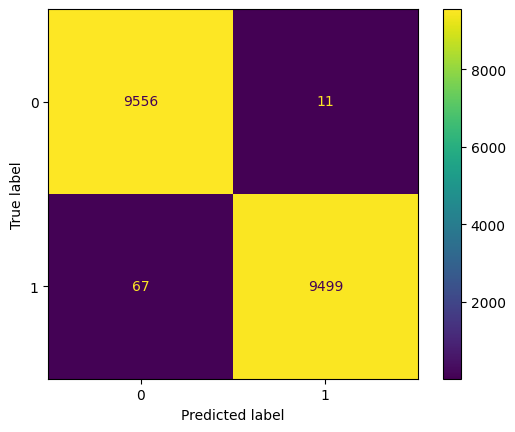

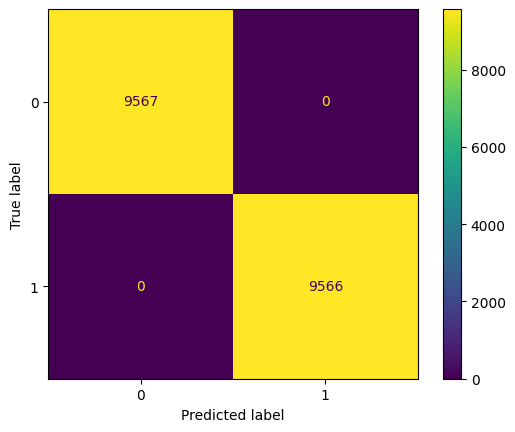

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, logistic_model.predict(X_test_scaled))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

cm = confusion_matrix(y_test, random_forest_model.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


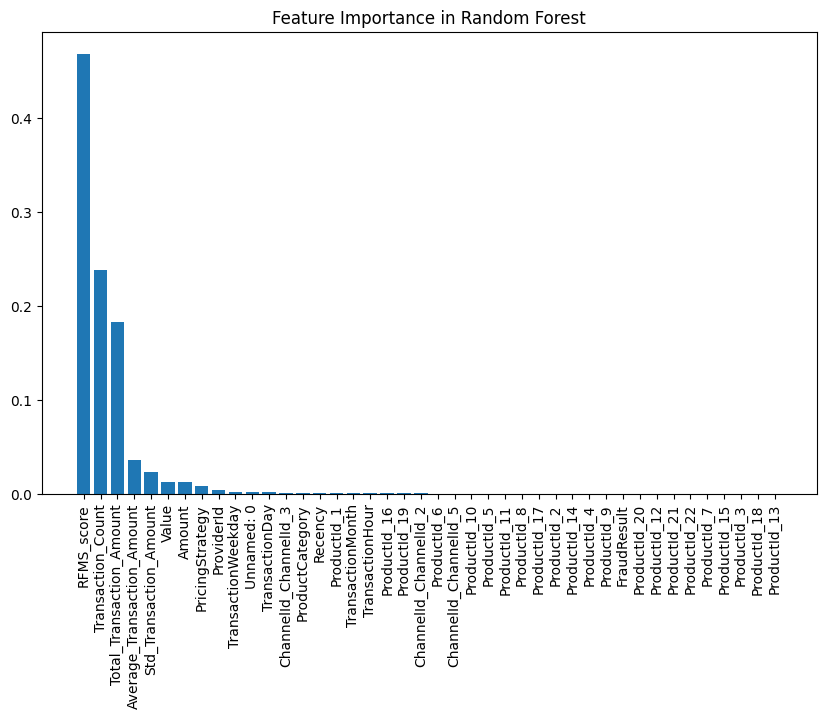

In [15]:
import matplotlib.pyplot as plt
import numpy as np

importance = random_forest_model.feature_importances_
indices = np.argsort(importance)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance in Random Forest")
plt.bar(range(X_train.shape[1]), importance[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.show()

